# Introduction to Support Vector Machines


## Objectives

- Get familiar with the theory behind Support Vector Machines
- Learn how to Optimize with our 'C' variable
- Work with Kernels  & more optimizations

### Definitions:

term / variable | definition
--------|----------
Vector | a quantity having direction and magnitude
Hyperplane |  a subspace of one dimension less than the ambient space, which allows us to split our space.
Kernel | function that enables us to transform our euclidean geometry in some way.  (Think similiarity function ~ dot products between vectors). 
$$b$$| intercept (hyperplane translation from origin)
$$\vec{w}$$ | normal vector (determines hyperplane orientation)
$$\vec{x_i}$$ | sample vector
$$\alpha_i$$ | Lagrangian weight
$$C $$|  Regularization Term ( Allows us to vary our number of support vectors, ie margin of our 'street') (default = 1)
$$epsilon$$ | our slack variable
$$kernel$$ |  scikit learn parameter. Specify kernel of choice : 'linear','rbf','poly' (default is rbf)
$$order$$ | degree of polynomial kernel function (default is 3)
$$gamma$$ | Kernel gaussian coefficient for 'rbf' kernel (default is 0) 

reference : http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
% pylab inline
import pandas as pd
from sklearn import datasets, svm
iris=datasets.load_iris()
X=iris.data
data=pd.DataFrame(X)
data['label']=iris.target

set0=data[data.label==0][[0,1]]
set1=data[data.label==1][[0,1]]
set2=data[data.label==2][[0,1]]


Populating the interactive namespace from numpy and matplotlib


### How would we split this dataset?  

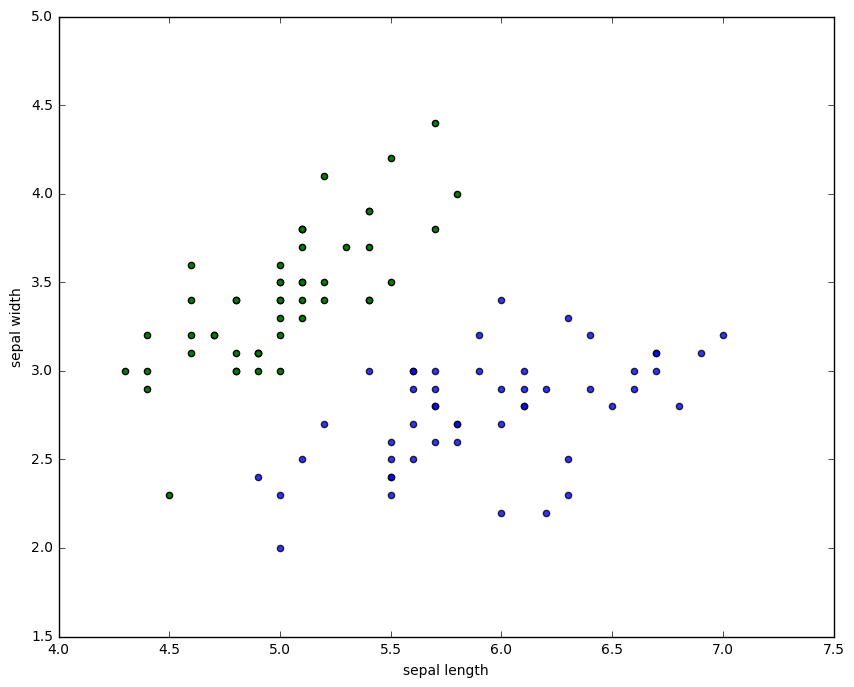

In [2]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(set0[0],set0[1], c='g')
plt.scatter(set1[0],set1[1], c='b',alpha =.8)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## And How would we split THIS dataset? 


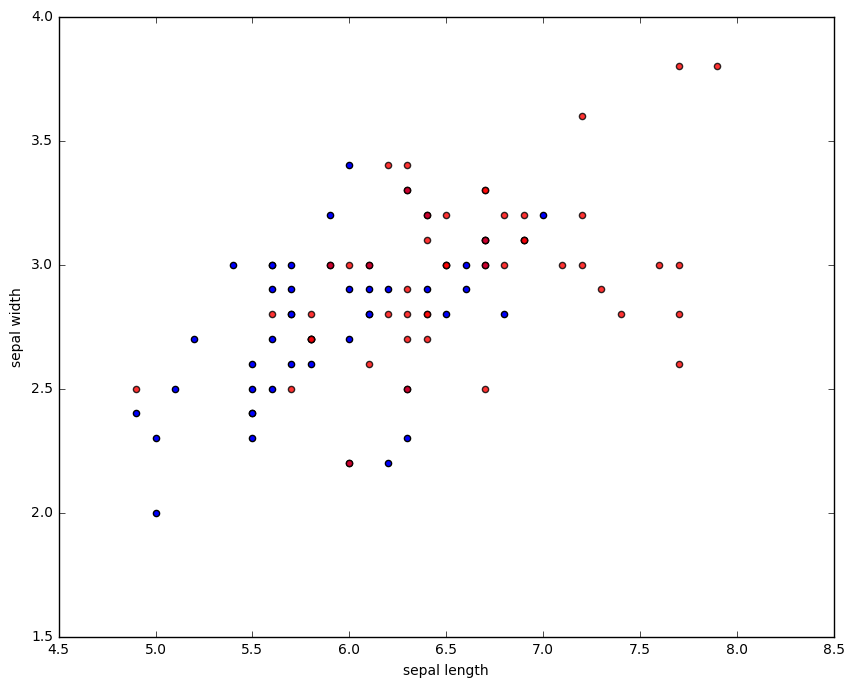

In [3]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(set1[0],set1[1], c='b')
plt.scatter(set2[0],set2[1], c='r',alpha =.8)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### HOW? 

<img src='img/image2.png'/>


$$\vec{w}\cdot\vec{x} +b \geq 0   ?$$   

<img src='img/image3.png'/>

##### EQN 0:  
Given some test vector (u), we want to know which side of our decision boundary u would be: 
$$ w\cdot{{u}} + b = ?  $$
 
##### Our Constraints: (EQN(s) 1) 

$$ w\cdot{{x_2}} + b = +1 $$
$$ w\cdot{{x_1}} + b = -1 $$


$$ (w\cdot{{x_2}}) -(w\cdot{{x_1}})= 2 $$

$$width =({x}_{2}-{x}_{1})\cdot{{\vec{w}\above 1pt\|w\|}}={{2\above 1pt\|w\|}}$$

#####  EQN 2
$$MIN :  {{1/2*\|w\|^2}}$$


 s.t. 
$$(w.x +b) >= 1 $$ (for our positive class)
$$(w.x+b) <= -1 $$ (for our negative class)
 
 

 The beauty of the SVM is that if the data is linearly separable, there is a 
 unique global min. value.  
 
 


##### Lagrange Multipliers:
This is constrained optimization problem, then we'll use a technique called: Lagrange Multipliers. 
Regarranging the above  inserting our Lagrange Mulipliers (alpha) we have:

######  This will be our cost function (EQN 3) 

  $$ L=  1/2{{\|w\|}^2} - \sum \alpha_i[(y_i(\vec{w}\cdot{x_i} +b)-1] $$
  
  
#####  And how do we find minima  ?   
- taking partial derivative of L with respect to w), we find that :  
(EQN 4) 

  $$\vec{w} = \sum \alpha_i(y_i{x_i})$$
  
- (We see that vector w is just a linear sum of our samples!)

- And taking partial derivative of L (with respect to b) we have:  
(EQN 5) 

  $$ \sum \alpha_i(y_i)=0$$
  
- We can insert these derivatives back into our equation..  
(EQN 6) 
 
  $$ L= \sum \alpha_i -1/2\sum\sum\alpha_i\alpha_j(y_iy_j)(x_i\cdot{x_j})$$

Our optimization has **complete dependence** on pairs of samples..


#####  Our final Hyperplane Equation  
(pluggin w into our first equation (EQN 1)): 

 
  $$ \sum\alpha_iy_i(x_i\cdot{x_j}) + b  = 1    $$  
    
Again, our final equation has **complete dependence** on pairs of samples!



### A Trivial Example:

- Lets take our 2 points from Figure 3.  These points are our support vectors
- We would like to discover a simple SVM that accurately discriminates between 
our two classes.

 $ x_1= \begin{bmatrix}5.4\\3\end{bmatrix}$  (positive sample)

 $ x_2 =\begin{bmatrix}5\\3\end{bmatrix}$    (negative sample)

In order to account for our bias input, we can adjust our vectors as follows:
    
 $ {x_1}= \begin{bmatrix}5.4\\3\\1\end{bmatrix}$
 
 $ x_2 =\begin{bmatrix}5\\3\\1\end{bmatrix}$
 
 Using the structure we developed in our final equation, we have:
 
  $$\alpha_1(x_1\cdot(x_1)) + \alpha_2(x_1\cdot(x_2)) = +1 $$
  $$\alpha_1(x_1\cdot(x_2)) + \alpha_2(x_2\cdot(x_2)) = -1 $$
  
  $$ (39.16)\alpha_1 + (37)\alpha_2 = +1 $$
  $$ (37)\alpha_1 + (35)\alpha_2 = - 1 $$
  
  A little algebra will give us a solution to the system of equations:
  
  $$\alpha_1= 2.18$$
  $$\alpha_2 =-1.25$$
  
  
  Using EQN 4), we can find our hyperplane 
  
  
   $$\vec{w} = \sum \alpha_i({x_i})$$
   
   =$$2.18\begin{bmatrix}5.4\\3\\1\end{bmatrix}  - 1.25\begin{bmatrix}5\\3\\1\end{bmatrix} =$$
   
   $$\begin{bmatrix}5.522\\2.79\\.93 \end{bmatrix}$$
   
   Alas, the above vector describes our separating hyperplane equation ( (with the last value as our bias)
   
   y = wx + b , where w = $$\begin{bmatrix}5.522\\2.79\end{bmatrix}$$
   and b = 0.93
   
   
   Finally: we can visualize our Hyperplane!
   
   <img src='img/iris_split4.png'/>

In [3]:
import pandas as pd
from sklearn import datasets, svm
import seaborn as sns

In [4]:
# In order gain more intuition about how we are splitting our grid: we'll build the plot_estimator 
def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    x_min, x_max =X[:,0].min() -1, X[:,0].max() +.1
    y_min, y_max =X[:,1].min() -1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
                        
    Z= estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z=Z.reshape (xx.shape)
    plt.figure(figsize=(12,12))
    plt.pcolormesh(xx,yy, Z, cmap='RdBu')
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1],c=y)

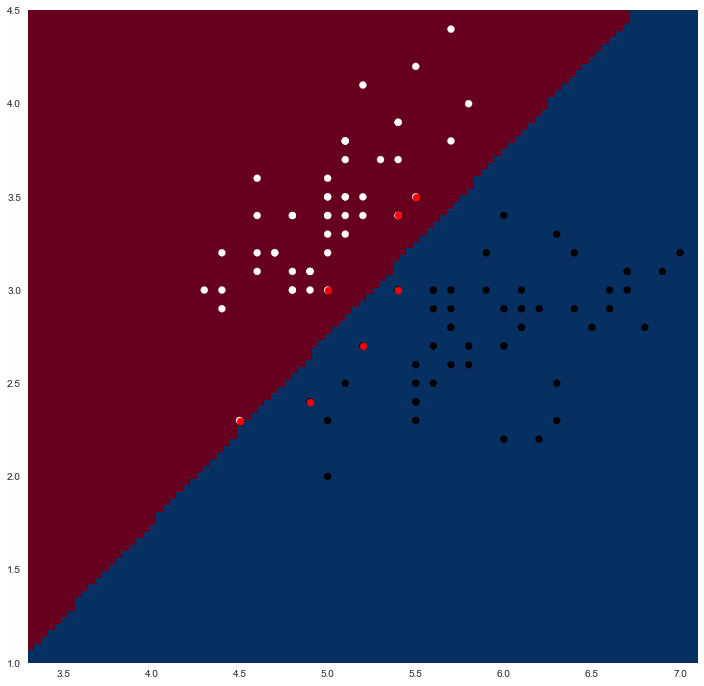

In [6]:
# How can we control the size of our margin? 

iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=2,:2] 
y = iris.target[y!=2]

svc = svm.SVC(kernel='linear', C=10).fit(X, y)
#svc = svm.LinearSVC(C=1).fit(X, y)
plot_estimator(svc,X,y)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c='r');

### C ~ is a Regularization Parameter:
- small C allows -> large margins -> larger number of support vectors -> may be penalized for having vectors within the margins 
- large C  -> smaller margin (nice training error!, but could be overfit..)


### Review: 

-  Which parameters determine our hyperplane ?

-  What are the advantages of using few support vectors vs. many?

-  How do you feel SVMs might behave in regards to outliers ? 

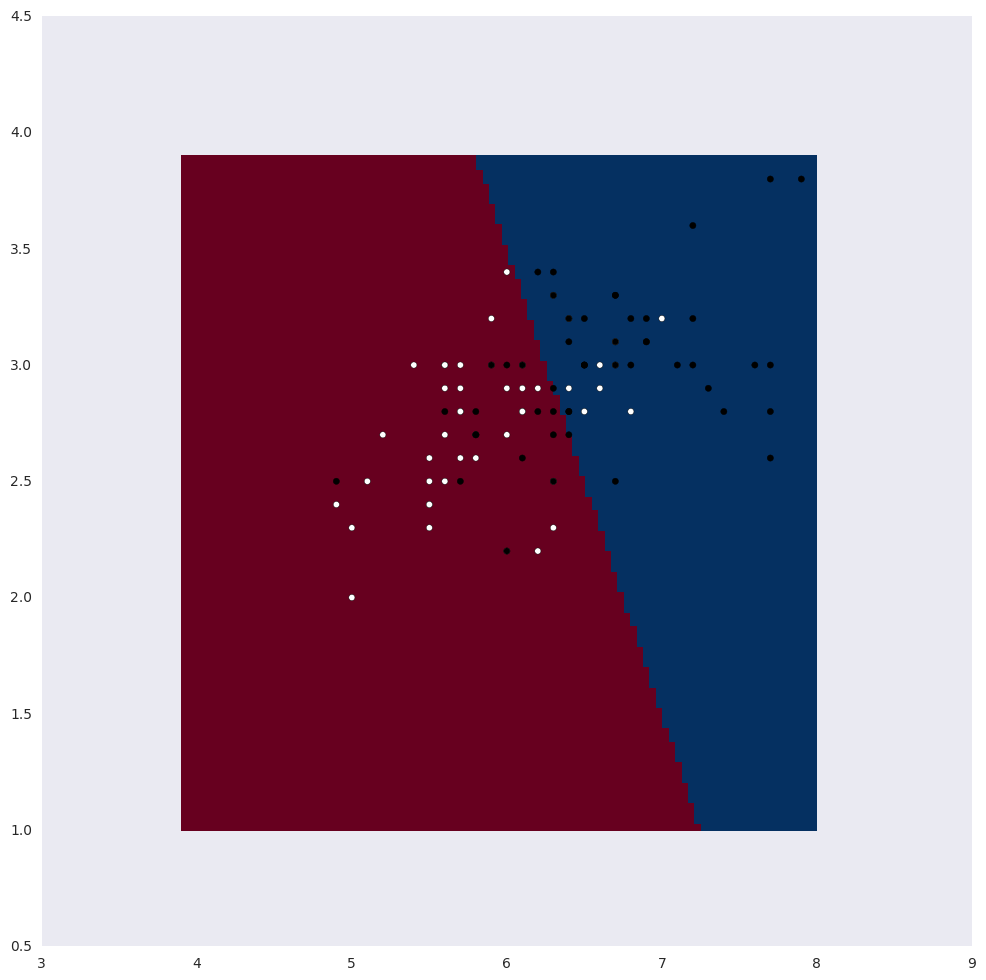

In [63]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=0,:2] 
y = iris.target[y!=0]

svc = svm.SVC(kernel='linear', C=100).fit(X, y)
plot_estimator(svc,X,y)
#plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c='r')


### What about when are data is not linearly separated ? 

Our cost function can penalize for the slack variables.     
(Slack variables are those instances that are within the margin, and those instances that
are on the wrong side of our hyperplane) 

We want to minimize the following:   

$$ L=  (1/2{{\|w\|}^2} + C\sum\zeta) - \sum \alpha_i[(y_i(\vec{w}\cdot{x_i} +b)-1 +\zeta] - \sum \beta\zeta $$     

As with previous cost functions (OLS), we see here that we have a trade-off:   
The smaller C, the larger the margin is (alas, more slack variables).      
Very large C results in large penalties on slack variables (hence the 1/2(w)^2 will dominate the cost function) 

<img src='img/slack.png'/>

## What Else can we do ?   The Kernel Trick.


If we are stuck in a space that is not linearly separable: simply switch to a new space.

What we need is a transformation (i.e. a Kernel!)

Remember we said that our maximization only depends on dot products?
Luckily, a kernel method is an algorithm that depends only on dot products.
Our dot products can be replaced by a kernel function which computes a dot product in some (potentially) higher dimensional feature space.

This allows us to generate a non-linear decision boundary.   Further, this allows us to apply a classifier to data that would normally have no obvious dividing plane.

Let's see what this actually looks like.. 

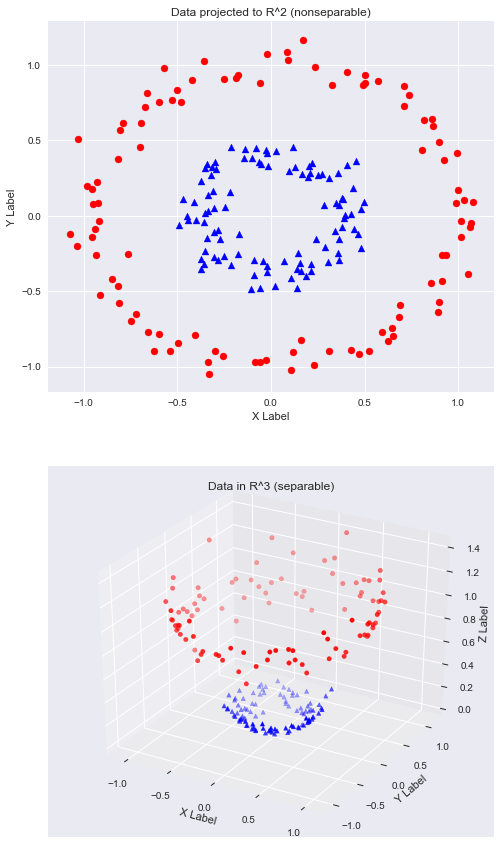

In [7]:
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles


def fn_kernel(x1, x2):
    """ Implements a kernel phi(x1,y1) = [x1, y1, x1^2 + y1^2] """
    return np.array([x1, x2, x1**2.0 + x2**2.0])

""" Generate linearly nonseparable dataset (in R^2) """
    
n = 200


# make_circles: a simple binary dataset that allows to visualize clustering and clasification

X, Y = make_circles(n_samples=n, noise=0.07, factor=0.4)

A=X[Y==0]
B=X[Y==1]

# where X,Ys are in regards to our cartesian coordinate 
X0_orig=A[:,0]
Y0_orig=A[:,1]

X1_orig=B[:,0]
Y1_orig=B[:,1]

frac0=len(A)/float(len(Y))
frac1=len(B)/float(len(Y))

#print ("Percentage of '0' labels:", frac0)
#print ("Percentage of '1' labels:", frac1)


# What does zip function do?
# Returns a list of tuples, where each tuple contains the ith element.. 

C= np.array([fn_kernel(x,y) for x,y in zip((X0_orig),(Y0_orig))])
X0=C[:,0]
Y0=C[:,1]
Z0=C[:,2]

D= np.array([fn_kernel(x,y) for x,y in zip((X1_orig),(Y1_orig))])
X1=D[:,0]
Y1=D[:,1]
Z1=D[:,2]

def plot_projection():    
    fig = plt.figure(figsize=(8,15))
   

    # Project data to X/Y plane
    ax2d = fig.add_subplot(211)
    ax2d.scatter(X0, Y0, c='r', marker='o')
    ax2d.scatter(X1, Y1, c='b', marker='^')

    ax2d.set_xlabel('X Label')
    ax2d.set_ylabel('Y Label')
    ax2d.set_title("Data projected to R^2 (nonseparable)")
    
    ax = fig.add_subplot(212, projection='3d')

    ax.scatter(X0, Y0, Z0, c='r', marker='o')
    ax.scatter(X1, Y1, Z1, c='b', marker='^')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title("Data in R^3 (separable)")

    plt.show()
    

    

plot_projection()
    


### Different Types of Kernels

- scikit-learn provides us with several types of Kernels to work with:

1) 'linear' : Linear decision boundary
        
    
2) 'poly' : Polynomial decicion boundary (adjust the order via 'order' argument)

    
3) 'rbf': Radial Basis Function decision boundary ( inserts Gaussian kernel at each support vector, we can adjust the Gaussian kernel via the Gamma Feature)

  $$ \phi(x) = \exp^{(\epsilon*x)^2}$$


Loss equation:
  $$ L= \sum \alpha_i -1/2\sum\sum\alpha_i\alpha_j(y_iy_j)\phi(x_i)\cdot{\phi(x_j)}$$
   


In [68]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# develop your "tuned parameters"

#from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)



iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=0,:2] 
y = iris.target[y!=0]


# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(iris)


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2,1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel':['poly'],'degree':[1,2,3]}]

scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Grid scores on development set:

0.707 (+/-0.100) for {'kernel': 'rbf', 'C': 1, 'gamma': 1}
0.876 (+/-0.049) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.707 (+/-0.100) for {'kernel': 'rbf', 'C': 10, 'gamma': 1}
0.752 (+/-0.117) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.876 (+/-0.049) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.000 (+/-0.000) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.000 (+/-0.000) for {'kernel': 'rbf', 